#Ensemble Methods
 

*   They are typically used to improve a ML model by combining several **weak learners**.
*   **Bagging** is an example of a parallel ensemble where multiple weak learners can be trained in parallel. The final output of the ensemble is calculated by taking average of all the output class probabilities thereby reducing the variance in the output. 

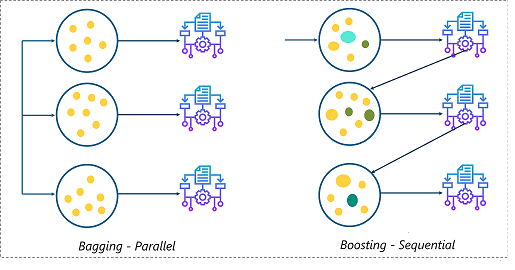

#Boosting

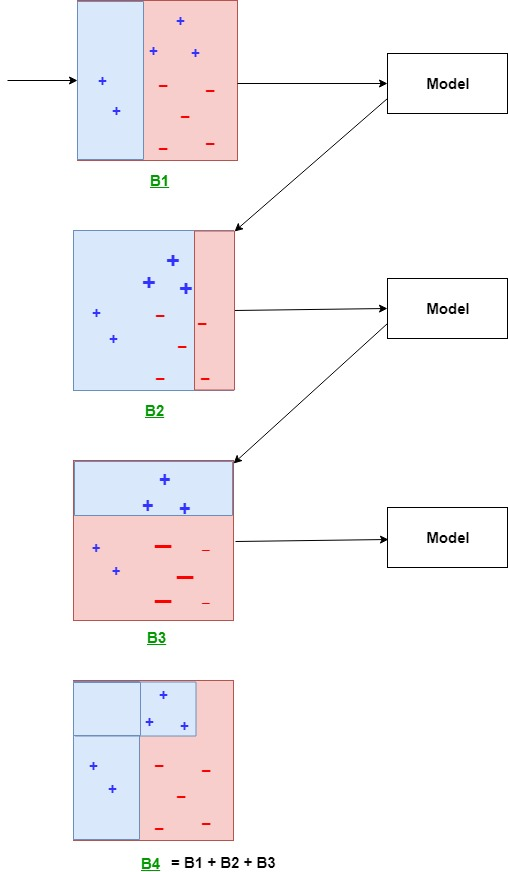


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from numpy import zeros
## ADABOOST
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
#X,y = load_iris(return_X_y=True)
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
#clf = AdaBoostClassifier(LogisticRegression(),n_estimators=100, random_state=0)
acc=zeros(20)

In [ ]:
for i in range(1,21):
  # clf = AdaBoostClassifier(SVC(probability=True, kernel='linear'),n_estimators=i, random_state=0)
  clf = AdaBoostClassifier(LogisticRegression(),n_estimators=i, random_state=0)
  clf.fit(X, y)
  acc[i-1]=clf.score(X, y)


Text(0, 0.5, 'Accuracy')

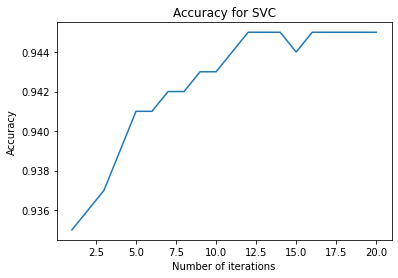

In [ ]:
plt.plot(range(1,21),acc)
plt.title('Accuracy for Log Reg')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')

In [ ]:
class customMLPClassifer(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled


    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and
                                            hasattr(self, "classes_")))


In [ ]:
for i in range(1,5):
  clf = AdaBoostClassifier(base_estimator=customMLPClassifer(),n_estimators=i, random_state=0)
  clf.fit(X, y)
  acc[i-1]=clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modi

Text(0, 0.5, 'Accuracy')

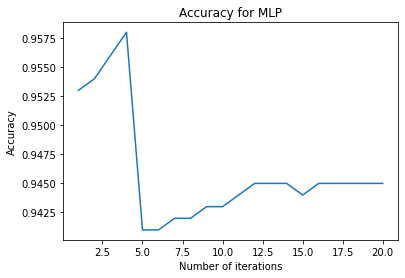

In [ ]:
plt.plot(range(1,21),acc)
plt.title('Accuracy for MLP')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')